In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftshift
from numpy import linalg
from scipy.stats import uniform, norm
from scipy.stats import multivariate_normal

In [2]:
a0,a1 = -0.3,0.5

In [ ]:
beta = 25.0
alpha = 2.0

In [ ]:
s = np.sqrt(1.0/beta)

In [5]:
X = uniform.rvs(loc=-1, scale=2, size=(20,))
tt = a0 + a1 * X + norm.rvs(loc=0, scale=s, size=(20,))

In [6]:
phi = np.vstack((np.ones(20), X)).T
x, y = np.mgrid[-1:1:.02, -1:1:.02]

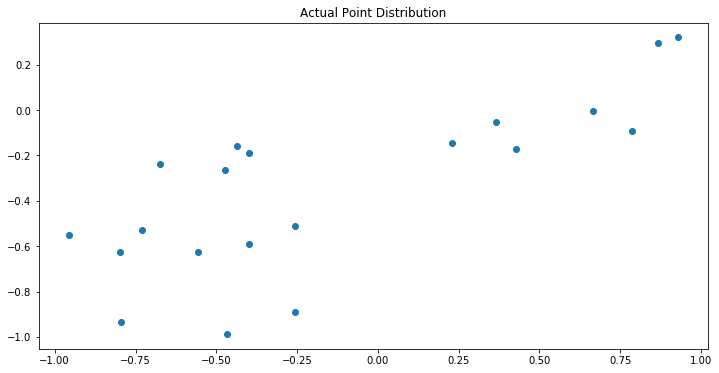

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(X, tt,'o')
plt.title("Actual Point Distribution")
plt.show()

In [8]:
def plot_prior_posterior(x,y,z):
    plt.figure(figsize=(6, 6))
    #plt.subplot(1,3,2)
    plt.contourf(x.T, y.T, z)
    plt.plot(-0.3,0.5,'*')
    plt.xticks([-1,0,1])
    plt.yticks([-1,0,1])
    plt.title("prior/posterior")
    plt.text(0.5, -1.1, '$w_0$', fontsize='xx-large')
    plt.text(-1.2, 0.5, '$w_1$', fontsize='xx-large')
    plt.show()

In [9]:
def plot_data_space(x,n,ww0,ww1):
    plt.figure(figsize=(6, 6))
    #plt.subplot(1,3,3)
    
    plt.plot(X[:n], tt[:n], 'o')
    for idx in range(6):
        plt.plot(x, ww0[idx] + ww1[idx] * x, 'r')
    plt.xticks([-1,0,1])
    plt.yticks([-1,0,1])
    plt.ylim(-1,1)
    plt.title("data space")
    plt.text(0.5, -1.1, '$x$', fontsize='xx-large')
    plt.text(-1.2, 0.5, '$y$', fontsize='xx-large')
    plt.show()

In [10]:
def plot_likehood(x,y,z1):
    plt.figure(figsize=(6, 6))
    #plt.subplot(1,3,1)
    plt.contourf(x, y, z1)
    plt.plot(-0.3,0.5,'*')
    plt.xticks([-1,0,1])
    plt.yticks([-1,0,1])
    plt.title("likehood")
    plt.text(0.5, -1.1, '$w_0$', fontsize='xx-large')
    plt.text(-1.2, 0.5, '$w_1$', fontsize='xx-large')
    plt.show()

data number: 0


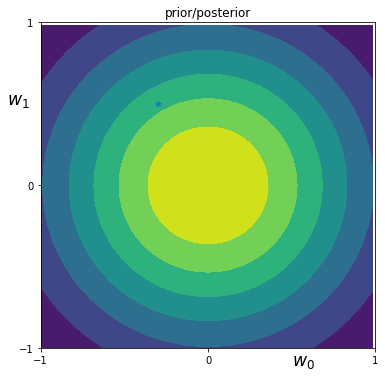

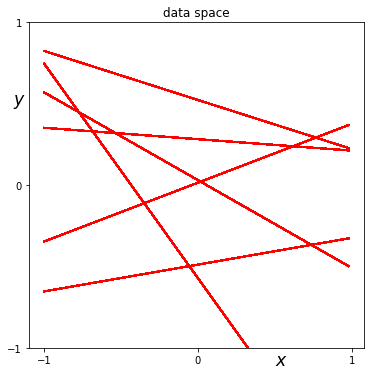

[ 0.01661846  0.03249884  0.28346226 -0.48571696  0.52392097 -0.56820966] [ 0.36052821 -0.53792703 -0.06996884  0.16419565 -0.30065286 -1.31441561]
data number: 1


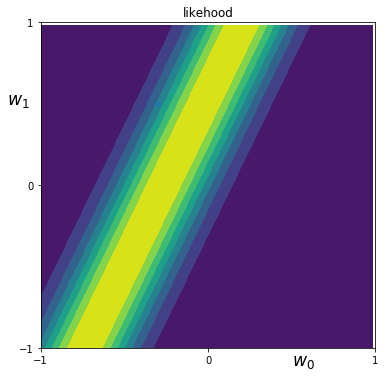

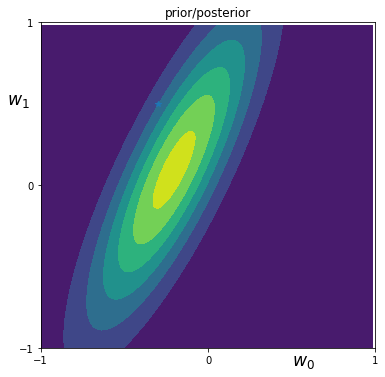

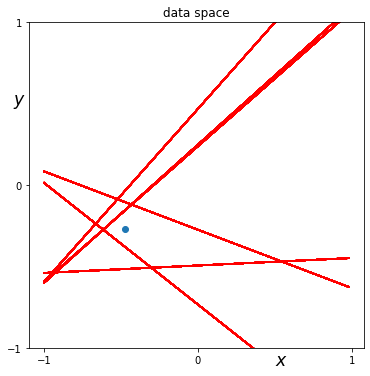

[-0.73023031  0.46916887  0.25000611 -0.49099412 -0.27180539  0.23980447] [-0.7452743   1.05956465  0.84668463  0.04568299 -0.35745887  0.8297135 ]
data number: 2


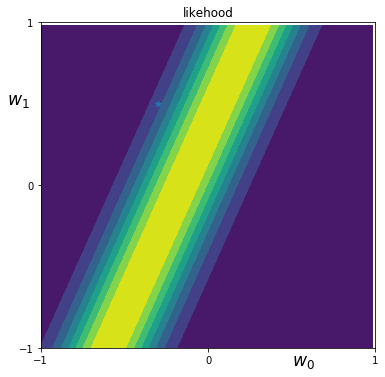

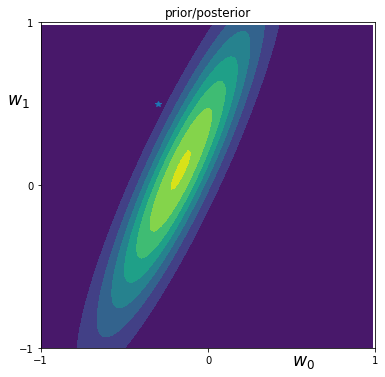

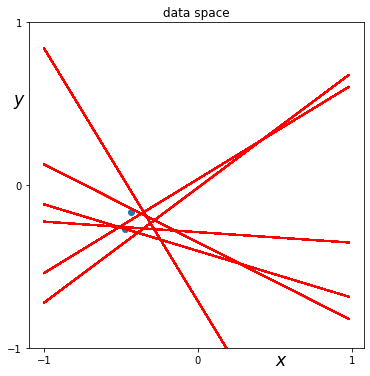

[-0.70979933 -0.28658209 -0.4020666  -0.01417054  0.03893674 -0.34927085] [-1.54961557 -0.06442193 -0.28559271  0.70449725  0.57600922 -0.47833821]
data number: 20


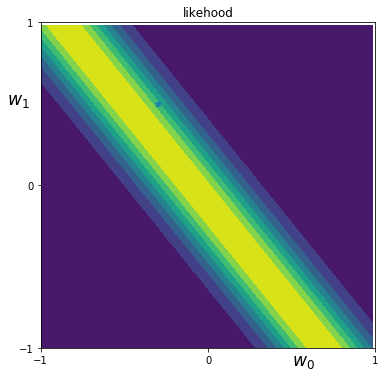

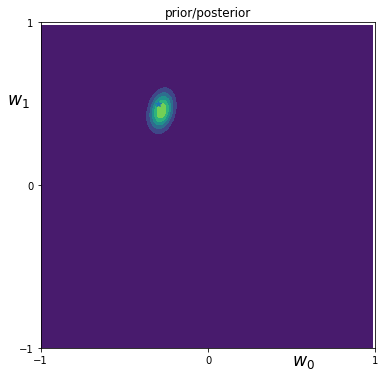

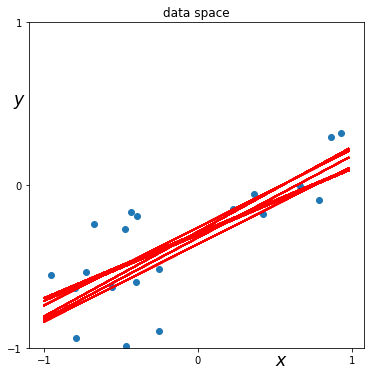

[-0.36002755 -0.29157516 -0.32038436 -0.30402666 -0.25779506 -0.28393719] [0.47554384 0.39873471 0.50070392 0.4034273  0.47704619 0.51872572]


In [11]:
nums = [0,1,2,20]
for idx in range(4):
    n = nums[idx]
    z1 = 1 / np.sqrt(2*np.pi) / s *np.exp(-(tt[n-1] - x - y * X[n-1]) ** 2 / 2 / s ** 2) 
    print("data number:",n)
    if(idx>0):
        plot_likehood(x,y,z1)
    S = linalg.inv(alpha * np.eye(2) + beta * np.dot(phi[:n].T, phi[:n]))
    mu = beta * np.dot(np.dot(S, phi[:n].T), tt[:n])
    
    var =  multivariate_normal(mean=mu,cov=S)
    z= var.pdf(np.mgrid[-1:1:.02,-1:1:.02].T)
    plot_prior_posterior(x,y,z)
    ww = multivariate_normal.rvs(mean=mu,cov=S, size=6)
    ww0, ww1 = ww[:, 0], ww[:, 1]
    plot_data_space(x,n,ww0,ww1)
    print(ww0,ww1)